# CS-GY 6313/CUSP-GX 6006 Information Assignment 1

Given: Two triangle positions in 3D, triangle colors, and camera parameters. 

Output: Saved and visualizable color images from the three given cameras (as .png, .jpg, etc.)

##Inputs:

3D Coordinates of the vertices two triangles (vertices1, vertices2, vertices3)

```
tri1_vertices = [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2)]
tri2_vertices = [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2)] 
```
Camera parameters (position, forward/facing direction, up/camera orientation, fov). Assume aspect ratio is 1:1 and FOV in degrees.
```
cam1 = [(x0, y0, z0), (x0_f, y0_f, z0_f), (x0_u, y0_u, z0_u), fov0]
cam2 = [(x1, y1, z1), (x1_f, y1_f, z1_f), (x1_u, y1_u, z1_u), fov1]
cam3 = [(x2, y2, z2), (x2_f, y2_f, z2_f), (x2_u, y2_u, z2_u), fov2]
```



Changelog: 
10/6: Fixed last row of translate_center_to_origin to be [0, 0, 0, 1] instead of [0, 0, 1, 0]
9/29: Fixed a variable typo in scale_by_2_matrix to 2/(t-b), orginally 2/(l-b) 

# Programming exercises

In [ ]:
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt 
import numpy as np
import math

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Render triangles in camera using CPU-only rasterisation.


Write a function to render an image using camera settings and triangle vertices as the input. Write your own code for rasterization to render a triangle pix-by-pix. You can use any method to show the triangles (ex. Matplotlib, OpenCV, plotly, etc.) as long as you first perform Model-View-Projection.






# Complete the functions for Model View Projection

Model: objects to coordinates in world space

View: from world space to camera space

Projection: from camera space to clip/screen space

In [ ]:
# Since our triangle vertices are already in world space (x, y, z), there's
# no need write a function for the Model part of MVP! We can jump directly to 
# getting the view matrix and using that to get the camera coordinates.

In [ ]:
def view(camera, triangle1, triangle2):
  ### TODO: Find R_view and T_view using the camera settings
  T_view = [(1,0,0,-(camera[0][0])),(0,1,0,-(camera[0][1])),(0,0,1,-(camera[0][2])),(0,0,0,1)]
  print('T_VIEW')
  print(T_view)
  g_axis = np.subtract(camera[1],camera[0])
  CDirection= g_axis/np.linalg.norm(g_axis)
  CProd = np.cross(CDirection, camera[2])
  Rcamera = CProd/np.linalg.norm(CProd)
  Ucamera = np.cross(Rcamera, CDirection)
  R_view = [(Rcamera[0],Rcamera[1],Rcamera[2],0),(Ucamera[0],Ucamera[1],Ucamera[2],0),(CDirection[0],CDirection[1],CDirection[2],0),(0,0,0,1)]
  print(R_view)
  ### TODO: Use M_view to find the vertices coordinates in camera space
  M_view = np.matmul(R_view, T_view)
  print('M_VIEW')
  print(M_view)
  
  tri1_vert1 = np.matmul(M_view,np.append(triangle1[0],[1]))
  tri1_vert2 = np.matmul(M_view,np.append(triangle1[1],[1]))
  tri1_vert3 = np.matmul(M_view,np.append(triangle1[2],[1]))

  tri2_vert1 = np.matmul(M_view,np.append(triangle2[0],[1]))
  tri2_vert2 = np.matmul(M_view,np.append(triangle2[1],[1]))
  tri2_vert3 = np.matmul(M_view,np.append(triangle2[2],[1]))

  tri1_in_camera_space = [np.ravel(tri1_vert1), np.ravel(tri1_vert2), np.ravel(tri1_vert3)]   
  tri2_in_camera_space = [np.ravel(tri2_vert1), np.ravel(tri2_vert2), np.ravel(tri2_vert3)]
  print('TICS')
  return tri1_in_camera_space, tri2_in_camera_space

In [ ]:
view([(50, 10, 0), (0, 10, 0), (0, 1, 0), 90], [(0, 0, 0), (0, 30, 0), (35, 0, 35)],[(17, 0, 0), (0, 0, 17), (17, 45, 17)])

T_VIEW
[(1, 0, 0, -50), (0, 1, 0, -10), (0, 0, 1, 0), (0, 0, 0, 1)]
[(0.0, 0.0, -1.0, 0), (0.0, 1.0, 0.0, 0), (-1.0, 0.0, 0.0, 0), (0, 0, 0, 1)]
M_VIEW
[[  0.   0.  -1.   0.]
 [  0.   1.   0. -10.]
 [ -1.   0.   0.  50.]
 [  0.   0.   0.   1.]]
TICS


([array([  0., -10.,  50.,   1.]),
  array([ 0., 20., 50.,  1.]),
  array([-35., -10.,  15.,   1.])],
 [array([  0., -10.,  33.,   1.]),
  array([-17., -10.,  50.,   1.]),
  array([-17.,  35.,  33.,   1.])])

In [ ]:
def get_M_persp(field_of_view):
  aspect_ratio = 1
  ### TODO: Define r, l, b, t, n, and f. Return M_persp
  n = 0.1 # You can choose some very small number
  radian = field_of_view*(math.pi/180)
  t = math.tan(radian/2)*abs(n)
  r = aspect_ratio*t
  l = -r
  b = -t
  f = 100 # You can choose some very large number

  scale_by_2 = [[2/(r-l), 0, 0, 0], 
               [0, 2/(t-b), 0 , 0],
               [0, 0, 2/(n-f), 0],
               [0, 0, 0, 1]]

  translate_center_to_origin = [[1, 0, 0, -(r+l)/2],
                                [0, 1, 0, -(t+b)/2],
                                [0, 0, 1, -(n+f)/2],
                                [0, 0, 0, 1]]

  M_ortho = np.matmul(scale_by_2, translate_center_to_origin)

  ### TODO: Find M_persp
  M_ortho_to_persp = [[n,0,0,0],
             [0,n,0,0],
             [0,0,n+f,-n*f],
             [0,0,1,0]]
  M_persp = np.matmul(M_ortho,M_ortho_to_persp)
  print('M_PERSPECTIVE')
  print(M_persp)
  return M_persp

def perspective_projection(field_of_view, tri1, tri2):
  M_persp = get_M_persp(field_of_view)
  ### TODO: Use M_persp to find the vertices coordinates in camera space
  print(M_persp)
  triangle1v1 = np.matmul(M_persp,(tri1[0]))
  triangle1v2 = np.matmul(M_persp,(tri1[1]))
  triangle1v3 = np.matmul(M_persp,(tri1[2]))

  triangle2v1 = np.matmul(M_persp,(tri2[0]))
  triangle2v2 = np.matmul(M_persp,(tri2[1]))
  triangle2v3 = np.matmul(M_persp,(tri2[2]))
  
  #Triangle 1
  x1triangle1 = (triangle1v1[0]/triangle1v1[3])*50 + 50
  y1triangle1 = (triangle1v1[1]/triangle1v1[3])*50 + 50
  x2triangle1 = (triangle1v2[0]/triangle1v2[3])*50 + 50
  y2triangle1 = (triangle1v2[1]/triangle1v2[3])*50 + 50
  x3triangle1 = (triangle1v3[0]/triangle1v3[3])*50 + 50
  y3triangle1 = (triangle1v3[1]/triangle1v3[3])*50 + 50
  z1triangle1 = (triangle1v1[2]/triangle1v1[3]) * 50 + 50
  z2triangle1 = (triangle1v2[2]/triangle1v2[3]) * 50 + 50
  z3triangle1 = (triangle1v3[2]/triangle1v3[3]) * 50 + 50
  

  #Triangle 2
  x1triangle2 = (triangle2v1[0]/triangle2v1[3])*50 + 50
  y1triangle2 = (triangle2v1[1]/triangle2v1[3])*50 + 50
  x2triangle2 = (triangle2v2[0]/triangle2v2[3])*50 + 50
  y2triangle2 = (triangle2v2[1]/triangle2v2[3])*50 + 50
  x3triangle2 = (triangle2v3[0]/triangle2v3[3])*50 + 50
  y3triangle2 = (triangle2v3[1]/triangle2v3[3])*50 + 50
  z1triangle2 = (triangle2v1[2]/triangle2v1[3]) * 50 + 50
  z2triangle2 = (triangle2v2[2]/triangle2v2[3]) * 50 + 50
  z3triangle2 = (triangle2v3[2]/triangle2v3[3]) * 50 + 50
  

  tri_1_screen_coordinates = [(x1triangle1,y1triangle1,z1triangle1),(x2triangle1,y2triangle1,z2triangle1),(x3triangle1,y3triangle1,z3triangle1)]
  tri_2_screen_coordinates = [(x1triangle2,y1triangle2,z1triangle2),(x2triangle2,y2triangle2,z2triangle2),(x3triangle2,y3triangle2,z3triangle2)]

  return tri_1_screen_coordinates, tri_2_screen_coordinates

In [ ]:
field_of_view = 90
tri1 = [[0.0, -10.0, 50.0, 1.0], [0.0, 20.0, 50.0, 1.0], [-35.0, -10.0, 15.0, 1.0]]
tri2 = [[0.0, -10.0, 33.0, 1.0],[-17.0, -10.0, 50.0, 1.0],[-17.0, 35.0, 33.0, 1.0]]
perspective_projection(field_of_view, tri1, tri2)


M_PERSPECTIVE
[[ 1.         0.         0.         0.       ]
 [ 0.         1.         0.         0.       ]
 [ 0.         0.        -1.002002   0.2002002]
 [ 0.         0.         1.         0.       ]]
[[ 1.         0.         0.         0.       ]
 [ 0.         1.         0.         0.       ]
 [ 0.         0.        -1.002002   0.2002002]
 [ 0.         0.         1.         0.       ]]


([(50.0, 40.0, 0.10010010010010006),
  (50.0, 70.0, 0.10010010010010006),
  (-66.66666666666667, 16.66666666666667, 0.5672339005672313)],
 [(50.0, 34.848484848484844, 0.20323353656687004),
  (33.0, 40.0, 0.10010010010010006),
  (24.242424242424242, 103.03030303030303, 0.20323353656687004)])

In [ ]:
def mvp(camera, triangle1, triangle2):
  tri1_in_camera_space, tri2_in_camera_space = view(camera,triangle1,triangle2)
  tri1_in_screen_space, tri2_in_screen_space = perspective_projection(camera[3], tri1_in_camera_space, tri2_in_camera_space)
  return tri1_in_screen_space, tri2_in_screen_space, tri1_in_camera_space, tri2_in_camera_space

In [ ]:
def edfunc(a, b, c):
  if (c[0] - a[0]) * (b[1] - a[1]) - (c[1] - a[1]) * (b[0] - a[0]) >= 0:
    return True
  else:
    return False

def line(a, b, c, p, q):
  l1 = edfunc(a, b, (p,q))
  l2 = edfunc(b, c, (p,q))
  l3 = edfunc(c, a, (p,q))
  return l1 and l2 and l3

In [ ]:
def rasterize(tri1, tri2):
  pix = np.zeros(shape = (100, 100, 3)) # 100x100 matrix of RGB values 
  
  # The matrix format is [row][col], or [y][x], so color the pixs accordingly.
  ### TODO: Draw the triangles

#Triangle 2
  xpoint21 = tri2[0][0]
  ypoint21 = tri2[0][1]

  xpoint22 = tri2[1][0]
  ypoint22 = tri2[1][1]

  xpoint23 = tri2[2][0]
  ypoint23 = tri2[2][1]
  
  maxX = max(xpoint21, xpoint22, xpoint23);
  minX = min(xpoint21, xpoint22, xpoint23);
  maxY = max(ypoint21, ypoint22, ypoint23);
  minY = min(ypoint21, ypoint22, ypoint23);

  vs1 = (xpoint22 - xpoint21, ypoint22 - ypoint21);
  vs2 = (xpoint23 - xpoint21, ypoint23 - ypoint21);

  
  for x in range(int(minX),int(maxX)):
    for y in range(int(minY),int(maxY)):
  
      q = (x - xpoint21, y - ypoint21);

      s = np.cross(q, vs2) / np.cross(vs1, vs2);
      t = np.cross(vs1, q) / np.cross(vs1, vs2);

      if ( (s >= 0) and (t >= 0) and (s + t <= 1)):
        if((x >= 0 and x<100) and (y>= 0 and y < 100)):
          pix[y,x]=[0, 255, 0]


#Triangle 1
  xpoint1 = tri1[0][0]
  ypoint1 = tri1[0][1]

  xpoint2 = tri1[1][0]
  ypoint2 = tri1[1][1]

  xpoint3 = tri1[2][0]
  ypoint3 = tri1[2][1]

  maximumX = max(xpoint1, xpoint2, xpoint3);
  minimumX = min(xpoint1, xpoint2, xpoint3);
  maximumY = max(ypoint1, ypoint2, ypoint3);
  minimumY = min(ypoint1, ypoint2, ypoint3);

  vs1 = (xpoint2 - xpoint1, ypoint2 - ypoint1);
  vs2 = (xpoint3 - xpoint1, ypoint3 - ypoint1);

  
  for x in range(int(minimumX),int(maximumX)):
    for y in range(int(minimumY),int(maximumY)):
  
      q = (x - xpoint1, y - ypoint1);

      s = np.cross(q, vs2) / np.cross(vs1, vs2);
      t = np.cross(vs1, q) / np.cross(vs1, vs2);

      if ( (s >= 0) and (t >= 0) and (s + t <= 1)):
        if((x >= 0 and x<100) and (y>= 0 and y < 100)):
          pix[y,x]=[255, 0, 0]
   
  return pix

  # The matrix format is [row][col], or [y][x], so color the pixs accordingly.
  ### TODO: Draw the triangles
def anti_aliasing(pix,tri1, tri2): 

  tri1_Ax = tri1[0][0]
  tri1_Ay = tri1[0][1]
  tri1_Bx = tri1[1][0]
  tri1_By = tri1[1][1]
  tri1_Cx = tri1[2][0]
  tri1_Cy = tri1[2][1]

  tri2_Ax = tri2[0][0]
  tri2_Ay = tri2[0][1]
  tri2_Bx = tri2[1][0]
  tri2_By = tri2[1][1]
  tri2_Cx = tri2[2][0]
  tri2_Cy = tri2[2][1]


  for i in range(100):
    for j in range(100):

      t1_sum = 0
      t2_sum = 0

      pix1_t1 = 0
      pix2_t1 = 0
      pix3_t1 = 0
      pix4_t1 = 0
      pix1_t2 = 0
      pix2_t2 = 0
      pix3_t2 = 0
      pix4_t2 = 0

      p = i + 0.25
      q = j + 0.25

      p1t1 = line((tri1_Ax,tri1_Ay), (tri1_Bx,tri1_By),(tri1_Cx,tri1_Cy), p, q) or line((tri1_Ax,tri1_Ay), (tri1_Cx,tri1_Cy),(tri1_Bx,tri1_By), p, q)
      p1t2 = line((tri2_Ax,tri2_Ay), (tri2_Bx,tri2_By),(tri2_Cx,tri2_Cy), p, q) or line((tri2_Ax,tri2_Ay), (tri2_Cx,tri2_Cy),(tri2_Bx,tri2_By), p, q)
      if p1t1:
        pix1_t1 = 1
      if p1t2:
        pix1_t2 = 1

      p = i + 0.75
      q = j + 0.25

      p2t1 = line((tri1_Ax,tri1_Ay), (tri1_Bx,tri1_By),(tri1_Cx,tri1_Cy), p, q) or line((tri1_Ax,tri1_Ay), (tri1_Cx,tri1_Cy),(tri1_Bx,tri1_By), p, q)
      p2t2 = line((tri2_Ax,tri2_Ay), (tri2_Bx,tri2_By),(tri2_Cx,tri2_Cy), p, q) or line((tri2_Ax,tri2_Ay), (tri2_Cx,tri2_Cy),(tri2_Bx,tri2_By), p, q)
      if p2t1:
        pix2_t1 = 1
      if p2t2:
        pix2_t2 = 1

      p = i + 0.25
      q = j + 0.75

      p3t1 = line((tri1_Ax,tri1_Ay), (tri1_Bx,tri1_By),(tri1_Cx,tri1_Cy), p, q) or line((tri1_Ax,tri1_Ay), (tri1_Cx,tri1_Cy),(tri1_Bx,tri1_By), p, q)
      p3t2 = line((tri2_Ax,tri2_Ay), (tri2_Bx,tri2_By),(tri2_Cx,tri2_Cy), p, q) or line((tri2_Ax,tri2_Ay), (tri2_Cx,tri2_Cy),(tri2_Bx,tri2_By), p, q)
      if p3t1:
        pix3_t1 = 1
      if p3t2:
        pix3_t2 = 1

      p = i + 0.75
      q = j + 0.75

      p4t1 = line((tri1_Ax,tri1_Ay), (tri1_Bx,tri1_By),(tri1_Cx,tri1_Cy), p, q) or line((tri1_Ax,tri1_Ay), (tri1_Cx,tri1_Cy),(tri1_Bx,tri1_By), p, q)
      p4t2 = line((tri2_Ax,tri2_Ay), (tri2_Bx,tri2_By),(tri2_Cx,tri2_Cy), p, q) or line((tri2_Ax,tri2_Ay), (tri2_Cx,tri2_Cy),(tri2_Bx,tri2_By), p, q)
      if p4t1:
        pix4_t1 = 1
      if p4t2:
        pix4_t2 = 1

      t1_sum = pix1_t1 + pix2_t1 + pix3_t1 + pix4_t1
      t2_sum = pix1_t2 + pix2_t2 + pix3_t2 + pix4_t2

      if t1_sum == 0:
        pix[j][i][0] = 0 #red
      elif t1_sum == 1:
        pix[j][i][0] = 0.25 #red
      elif t1_sum == 2:
        pix[j][i][0] = 0.50 #red
      elif t1_sum == 3:
        pix[j][i][0] = 0.75 #red
      elif t1_sum == 4:
        pix[j][i][0] = 1 #red

      if t2_sum == 0:
        pix[j][i][1] = 0 #green
      elif t2_sum == 1:
        pix[j][i][1] = 0.25 #green
      elif t2_sum == 2:
        pix[j][i][1] = 0.50 #green
      elif t2_sum == 3:
        pix[j][i][1] = 0.75 #green
      elif t2_sum == 4:
        pix[j][i][1] = 1 #green

  for i in range(100):
    for j in range(100):
      if(pix[j][i][1] > 0 and pix[j][i][0]>0):
        if (z_buffer(i, j, tri1, tri2)):
          pix[j][i][1] = 0
        else: 
          pix[j][i][0] = 0 

  return pix

def form(perspective1_tri1):

  x1 = perspective1_tri1[0][0]
  y1 = perspective1_tri1[0][1]
  z1 = perspective1_tri1[0][2]
  x2 = perspective1_tri1[1][0]
  y2 = perspective1_tri1[1][1]
  z2 = perspective1_tri1[1][2]
  x3 = perspective1_tri1[2][0]
  y3 = perspective1_tri1[2][1]
  z3 = perspective1_tri1[2][2]

  a1 = x2 - x1
  b1 = y2 - y1
  c1 = z2 - z1
  a2 = x3 - x1
  b2 = y3 - y1
  c2 = z3 - z1
  a = b1 * c2 - b2 * c1
  b = a2 * c1 - a1 * c2
  c = a1 * b2 - b1 * a2
  d = (- a * x1 - b * y1 - c * z1)
  equation = [a,b,c,d]
  return equation

def z_buffer(i, j, tri1, tri2):
  
  f1 = form(tri1)
  f2 = form(tri2)
  
  z1 = (-i*f1[0] -j*f1[1] - f1[3])/f1[2]
  z2 = (-i*f2[0] -j*f2[1] - f2[3])/f2[2]
 
  if z1 > z2:
    return True
  else: 
    return False

In [ ]:
# Triangle vertices in 3D world space
tri1 = [(0, 0, 0), (0, 30, 0), (35, 0, 35)] # RGB(255, 0, 0), Red
tri2 = [(17, 0, 0), (0, 0, 17), (17, 45, 17)] # RGB(0, 255, 0), Green

# cam = [(x, y, z), (x_f, y_f, z_f), (x_u, y_u, z_u), fov]
# The first coordinate is where the camera is in world space. The second is what
# coordinate it is looking at/facing. The third represents the "up" axis.  
# Ex. cam1, cam3 up = positive of y-axis. cam2 up = negative if y-axis (upside-down camera)
cam1 = [(50, 10, 0), (0, 10, 0), (0, 1, 0), 90] 
cam2 = [(50, 10, 0), (0, 10, 0), (0, -1, 0), 105]
cam3 = [(0, 10, 60), (0, 10, 0), (0, 1, 0), 120] 

perspective1_tri1, perspective1_tri2, tri1_in_camera_space, tri2_in_camera_space = mvp(cam1, tri1, tri2)
perspective2_tri1, perspective2_tri2, tri1_in_camera_space, tri2_in_camera_space = mvp(cam2, tri1, tri2)
perspective3_tri1, perspective3_tri2, tri1_in_camera_space, tri2_in_camera_space = mvp(cam3, tri1, tri2)

# Draw triangles in 2D
perspective1 = rasterize(perspective1_tri1, perspective1_tri2) 
perspective2 = rasterize(perspective2_tri1, perspective2_tri2)
perspective3 = rasterize(perspective3_tri1, perspective3_tri2)

### TODO: antialiasing and occlusion

perspective1 = anti_aliasing(perspective1,perspective1_tri1, perspective1_tri2) 
perspective2 = anti_aliasing(perspective2,perspective2_tri1, perspective2_tri2)
perspective3 = anti_aliasing(perspective3,perspective3_tri1, perspective3_tri2)
# Replace with finished 100x100 matrix (row, column = y, x of pixs)
# perspective1 = np.zeros(shape = (100, 100, 3)) 
# perspective2 = np.zeros(shape = (100, 100, 3))
# perspective3 = np.zeros(shape = (100, 100, 3))

T_VIEW
[(1, 0, 0, -50), (0, 1, 0, -10), (0, 0, 1, 0), (0, 0, 0, 1)]
[(0.0, 0.0, -1.0, 0), (0.0, 1.0, 0.0, 0), (-1.0, 0.0, 0.0, 0), (0, 0, 0, 1)]
M_VIEW
[[  0.   0.  -1.   0.]
 [  0.   1.   0. -10.]
 [ -1.   0.   0.  50.]
 [  0.   0.   0.   1.]]
TICS
M_PERSPECTIVE
[[ 1.         0.         0.         0.       ]
 [ 0.         1.         0.         0.       ]
 [ 0.         0.        -1.002002   0.2002002]
 [ 0.         0.         1.         0.       ]]
[[ 1.         0.         0.         0.       ]
 [ 0.         1.         0.         0.       ]
 [ 0.         0.        -1.002002   0.2002002]
 [ 0.         0.         1.         0.       ]]
T_VIEW
[(1, 0, 0, -50), (0, 1, 0, -10), (0, 0, 1, 0), (0, 0, 0, 1)]
[(0.0, 0.0, 1.0, 0), (0.0, -1.0, 0.0, 0), (-1.0, 0.0, 0.0, 0), (0, 0, 0, 1)]
M_VIEW
[[ 0.  0.  1.  0.]
 [ 0. -1.  0. 10.]
 [-1.  0.  0. 50.]
 [ 0.  0.  0.  1.]]
TICS
M_PERSPECTIVE
[[ 0.76732699  0.          0.          0.        ]
 [ 0.          0.76732699  0.          0.        ]
 [ 0.   


Save the 100x100x3 RGB images you rendered with the given camera settings and triangle vertices. Images can be displayed using MatplotLib.

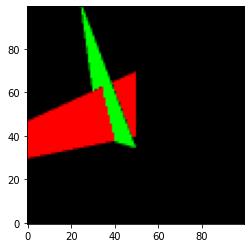

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

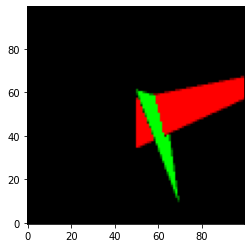

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

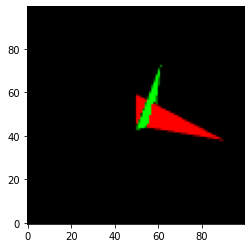

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
# Save and view images
# origin = "lower" sets origin of plot to bottom left
plt.imshow(perspective1, origin="lower") 
plt.show()
plt.savefig('perspective1.png')
files.download("perspective1.png") 
plt.imshow(perspective2, origin="lower") 
plt.show()
plt.savefig('perspective2.png')
files.download("perspective2.png") 
plt.imshow(perspective3, origin="lower") 
plt.show()
plt.savefig('perspective3.png')
files.download("perspective3.png") 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


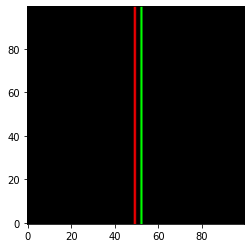

In [ ]:
# Example of how to plot an image with a red line at X = 49.
# Note that row = y, column = x value of pix
example_image = np.zeros(shape = (100, 100, 3))
for row in range(100):
  example_image[row][49] = [255, 0, 0]
  example_image[row][52] = [0, 255, 0]
plt.imshow(example_image, origin="lower")
plt.show()

# Submission details

Click "File" > "Save a Copy in Drive" and rename the file to your netID followed by "_InfoVisHW1." Ex. "bsl334_InfoVisHW1.ipynb"

You will be submitting your Colab notebook along with your three camera perspective images. 



Grading

```
Single triangle with MVP (50%)
Single triangle with MVP and anti-aliasing (75%)
Two triangles with MVP, anti-aliasing, and occlusion (100%) 
```